In [37]:
# Importing data
import pandas as pd

card = pd.read_csv('card.csv')
cost_structure = pd.read_csv('cost_structure.csv')
rates = pd.read_csv('rates.csv')
transactions = pd.read_csv('Transaction.csv')


In [38]:
# Inspecting card df
print(card.isna().sum())
card.head()


card_token                 0
card_produced_time         0
profile_owner_card         0
is_active                  0
profile_address_country    0
age_years                  0
email_domain               0
card_delivery_country      0
card_delivery_city         0
dtype: int64


,card_token,card_produced_time,profile_owner_card,is_active,profile_address_country,age_years,email_domain,card_delivery_country,card_delivery_city
0,ed39695c-a026-42ce-865d-8062a56ec18b,2017-10-03 18:01:53,1505,True,EE,30,transferwise.com,EE,Tallinn
1,3dcf0adc-c5eb-45b7-8a2c-3de3b68c3a6c,2017-10-19 21:27:01,1886894,True,IT,29,gmail.com,EE,Tallinn
2,99b81876-0b36-48db-9b5b-1fc2fe6cef86,2017-10-20 6:30:55,112168,True,EE,32,gmail.com,EE,Järveküla
3,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,2017-10-20 6:40:34,3454190,True,EE,24,transferwise.com,EE,Tallinn
4,83cd69a1-64e5-4526-aa7d-3e423ccedfe9,2017-10-20 6:49:58,273062,True,EE,34,transferwise.com,EE,Tallinn


In [39]:
# Inspecting cost_structure df
cost_structure.head()
print(cost_structure.isna().sum())

transaction_cost_type     0
cost_line                 0
fixed_or_variable         0
cost_region               0
cost_in_gbp              18
variable_fee             18
dtype: int64


In [40]:
# Inspecting rates df
rates.head()
print(rates.isna().sum())

code                    0
name                    0
rate_compared_to_gbp    3
rate_compared_to_usd    0
dtype: int64


In [41]:
# Inspecting transactions df

#transactions.head()
#print(transactions.isna().sum())


In [42]:
# Filtering success transactions only.
# Checking missing values and filling it with 'unknown' (for category columns only).

success_transactions = transactions[transactions['state'] == 'SUCCESS']
#print(success_transactions.isna().sum())
success_transactions.category.fillna('unknown', inplace=True)
print(success_transactions.isna().sum())
success_transactions.head()




id                                             0
transaction_time                               0
card_token                                     0
merchant_address_country                       0
cost_region                                    0
transaction_type                               0
transaction_cost_type                          0
transaction_personal_details_input             0
transaction_card_ownership_proof_method        0
state                                          0
decline_reason                             17388
amount_currency                                0
amount_value                                   0
billing_amount_currency                        0
billing_amount_value                           0
interchange_currency                           0
inter_change_fee                               0
merchant_name                                  0
category                                       0
dtype: int64


/var/folders/0z/m9cl6t6j2s1fkppmqvc22bbm0000gn/T/ipykernel_18002/1127956910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_transactions.category.fillna('unknown', inplace=True)


,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,state,decline_reason,amount_currency,amount_value,billing_amount_currency,billing_amount_value,interchange_currency,inter_change_fee,merchant_name,category
0,11472,2018-01-01 0:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,4.00,EUR,4.00,EUR,0.01,GRAND CAROUSEL.POHJA P,BarsCocktailLoungesDiscothe
1,11480,2018-01-01 2:16:29,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,EUR,40.00,EUR,40.00,EUR,-0.55,HAN000025 SIPELGA 1,ZMemberFinancialInstitut
2,11490,2018-01-01 11:57:05,e6af604f-973f-416d-86c9-5521425d2de4,EE,Inter,POS_PURCHASE,POS/ECOM,CHIP,PIN,SUCCESS,NaN,EUR,40.00,EUR,40.00,EUR,0.08,ALEXELA TALLINN SOLE T,FuelDispenserAutomated
3,11492,2018-01-01 12:13:00,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,2.50,EUR,2.50,EUR,0.01,CIRCLE K SUTISTE,ServiceStationsWithOrWithou
4,11494,2018-01-01 12:40:25,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,19.35,EUR,19.35,EUR,0.04,TOA,EatingPlacesRestaurants


In [43]:
# Merging successful transactions with rates on amount currency and code.
# Cleaning and changing data types (replacing if needed).

pd.set_option('display.max_columns', None)
success_transactions = success_transactions.merge(
    rates,
    left_on='amount_currency',
    right_on='code',
    how='left')

success_transactions.head()

success_transactions['amount_value'] = success_transactions['amount_value'].replace({',': ''}, regex=True)
success_transactions['billing_amount_value'] = success_transactions['billing_amount_value'].replace({',': ''}, regex=True)

success_transactions['amount_value'] = success_transactions['amount_value'].astype(float)
success_transactions['billing_amount_value'] = success_transactions['billing_amount_value'].astype(float)
success_transactions.dtypes

id                                           int64
transaction_time                            object
card_token                                  object
merchant_address_country                    object
cost_region                                 object
transaction_type                            object
transaction_cost_type                       object
transaction_personal_details_input          object
transaction_card_ownership_proof_method     object
state                                       object
decline_reason                              object
amount_currency                             object
amount_value                               float64
billing_amount_currency                     object
billing_amount_value                       float64
interchange_currency                        object
inter_change_fee                           float64
merchant_name                               object
category                                    object
code                           

In [44]:
# Defining function where if the amount currency and billing currency doesnt match,
# it needs to be matched to gbp for easier revenue and costs calculation.

def conversion_revenue(row):
    if row['amount_currency'] != row['billing_amount_currency']:
        return row['billing_amount_value'] - (row['amount_value'] * row['rate_compared_to_gbp'])
    else: 
        return 0

success_transactions['conversion_rev'] = success_transactions.apply(conversion_revenue, axis=1)
success_transactions['total_revenue'] = (success_transactions['inter_change_fee'] + success_transactions['conversion_rev'])

success_transactions[success_transactions['id'] == 34431].head(6)


,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,state,decline_reason,amount_currency,amount_value,billing_amount_currency,billing_amount_value,interchange_currency,inter_change_fee,merchant_name,category,code,name,rate_compared_to_gbp,rate_compared_to_usd,conversion_rev,total_revenue
1513,34431,2018-02-19 11:08:56,a5ab6ffd-d7aa-4e48-9939-1160e0dbb996,CZ,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,CZK,200.0,GBP,7.02,GBP,-0.45,CSOB 0516 PRAHA 7,ZMemberFinancialInstitut,CZK,Czech Koruna,0.034164,0.045851,0.1872,-0.2628


In [45]:
# Merge the previous dataframes again with cost structures on transaction cost type and region. 
# This allows the costs to be calculated.
# Then, calculating the fixed variable for each transactions.

success_transactions = success_transactions.merge(
    cost_structure, 
    left_on= ['transaction_cost_type', 'cost_region'], 
    right_on= ['transaction_cost_type', 'cost_region'],
    how = 'left')


fixed_costs = success_transactions[success_transactions['fixed_or_variable'] == 'Fixed']
fixed_costs_summary = fixed_costs.groupby('id')['cost_in_gbp'].sum().reset_index()
fixed_costs_summary.rename(columns={'cost_in_gbp': 'total_fixed_cost'}, inplace=True)
success_transactions = success_transactions.merge(fixed_costs_summary, on='id', how='left')

#fixed_costs_summary.head()
success_transactions.iloc[564:570]




,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,state,decline_reason,amount_currency,amount_value,billing_amount_currency,billing_amount_value,interchange_currency,inter_change_fee,merchant_name,category,code,name,rate_compared_to_gbp,rate_compared_to_usd,conversion_rev,total_revenue,cost_line,fixed_or_variable,cost_in_gbp,variable_fee,total_fixed_cost
564,12711,2018-01-09 22:24:39,4276e10c-693c-4bd9-99e0-4b399281bed7,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,GBP,8.4,GBP,8.4,GBP,0.02,THE RUSKIN ARMS,EatingPlacesRestaurants,GBP,British Pounds,1.0,1.342071,0.0,0.02,Scheme fees (auth and clearing),Fixed,0.009395,NaN,0.059395
565,12711,2018-01-09 22:24:39,4276e10c-693c-4bd9-99e0-4b399281bed7,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,GBP,8.4,GBP,8.4,GBP,0.02,THE RUSKIN ARMS,EatingPlacesRestaurants,GBP,British Pounds,1.0,1.342071,0.0,0.02,Issuer fees (WC),Fixed,0.020000,NaN,0.059395
566,12711,2018-01-09 22:24:39,4276e10c-693c-4bd9-99e0-4b399281bed7,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,GBP,8.4,GBP,8.4,GBP,0.02,THE RUSKIN ARMS,EatingPlacesRestaurants,GBP,British Pounds,1.0,1.342071,0.0,0.02,Processing fees (Carta),Fixed,0.030000,NaN,0.059395
567,12711,2018-01-09 22:24:39,4276e10c-693c-4bd9-99e0-4b399281bed7,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,GBP,8.4,GBP,8.4,GBP,0.02,THE RUSKIN ARMS,EatingPlacesRestaurants,GBP,British Pounds,1.0,1.342071,0.0,0.02,Scheme % fees (Issuing+Investment),Variable,NaN,0.000,0.059395
568,12711,2018-01-09 22:24:39,4276e10c-693c-4bd9-99e0-4b399281bed7,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,GBP,8.4,GBP,8.4,GBP,0.02,THE RUSKIN ARMS,EatingPlacesRestaurants,GBP,British Pounds,1.0,1.342071,0.0,0.02,Scheme FX,Variable,NaN,0.000,0.059395
569,12711,2018-01-09 22:24:39,4276e10c-693c-4bd9-99e0-4b399281bed7,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,GBP,8.4,GBP,8.4,GBP,0.02,THE RUSKIN ARMS,EatingPlacesRestaurants,GBP,British Pounds,1.0,1.342071,0.0,0.02,Interchange,Variable,NaN,-0.002,0.059395


In [46]:
# Calculating variable costs. And thus total costs (fixed + variable costs).

variable_costs = success_transactions[success_transactions['fixed_or_variable'] == 'Variable']
success_transactions['amount_value_in_gbp'] = success_transactions['amount_value'] * success_transactions['rate_compared_to_gbp']
success_transactions['variable_cost_per_row'] = success_transactions['amount_value_in_gbp'] * success_transactions['variable_fee']

variable_costs_summary = success_transactions.groupby('id')['variable_cost_per_row'].sum().reset_index()
success_transactions = success_transactions.merge(variable_costs_summary, on = 'id', how= 'left')
success_transactions.rename(columns={'variable_cost_per_row_x': 'variable_cost_granular'}, inplace=True)
success_transactions.rename(columns={'variable_cost_per_row_y': 'total_variable_cost'}, inplace=True)

success_transactions['total_cost'] = success_transactions['total_fixed_cost'] + success_transactions['total_variable_cost']
#variable_costs.head()
#variable_costs_summary.head(10)
success_transactions.head(10)

,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,state,decline_reason,amount_currency,amount_value,billing_amount_currency,billing_amount_value,interchange_currency,inter_change_fee,merchant_name,category,code,name,rate_compared_to_gbp,rate_compared_to_usd,conversion_rev,total_revenue,cost_line,fixed_or_variable,cost_in_gbp,variable_fee,total_fixed_cost,amount_value_in_gbp,variable_cost_granular,total_variable_cost,total_cost
0,11472,2018-01-01 0:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,4.0,EUR,4.0,EUR,0.01,GRAND CAROUSEL.POHJA P,BarsCocktailLoungesDiscothe,EUR,Euro,0.87951,1.180365,0.0,0.01,Scheme fees (auth and clearing),Fixed,0.01,NaN,0.06,3.51804,NaN,-0.001055,0.058945
1,11472,2018-01-01 0:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,4.0,EUR,4.0,EUR,0.01,GRAND CAROUSEL.POHJA P,BarsCocktailLoungesDiscothe,EUR,Euro,0.87951,1.180365,0.0,0.01,Issuer fees (WC),Fixed,0.02,NaN,0.06,3.51804,NaN,-0.001055,0.058945
2,11472,2018-01-01 0:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,4.0,EUR,4.0,EUR,0.01,GRAND CAROUSEL.POHJA P,BarsCocktailLoungesDiscothe,EUR,Euro,0.87951,1.180365,0.0,0.01,Processing fees (Carta),Fixed,0.03,NaN,0.06,3.51804,NaN,-0.001055,0.058945
3,11472,2018-01-01 0:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,4.0,EUR,4.0,EUR,0.01,GRAND CAROUSEL.POHJA P,BarsCocktailLoungesDiscothe,EUR,Euro,0.87951,1.180365,0.0,0.01,Scheme % fees (Issuing+Investment),Variable,NaN,0.0077,0.06,3.51804,0.027089,-0.001055,0.058945
4,11472,2018-01-01 0:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,4.0,EUR,4.0,EUR,0.01,GRAND CAROUSEL.POHJA P,BarsCocktailLoungesDiscothe,EUR,Euro,0.87951,1.180365,0.0,0.01,Scheme FX,Variable,NaN,0.0040,0.06,3.51804,0.014072,-0.001055,0.058945
5,11472,2018-01-01 0:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,SUCCESS,NaN,EUR,4.0,EUR,4.0,EUR,0.01,GRAND CAROUSEL.POHJA P,BarsCocktailLoungesDiscothe,EUR,Euro,0.87951,1.180365,0.0,0.01,Interchange,Variable,NaN,-0.0120,0.06,3.51804,-0.042216,-0.001055,0.058945
6,11480,2018-01-01 2:16:29,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,EUR,40.0,EUR,40.0,EUR,-0.55,HAN000025 SIPELGA 1,ZMemberFinancialInstitut,EUR,Euro,0.87951,1.180365,0.0,-0.55,Scheme fees (auth and clearing),Fixed,0.01,NaN,0.06,35.18040,NaN,0.481971,0.541971
7,11480,2018-01-01 2:16:29,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,EUR,40.0,EUR,40.0,EUR,-0.55,HAN000025 SIPELGA 1,ZMemberFinancialInstitut,EUR,Euro,0.87951,1.180365,0.0,-0.55,Issuer fees (WC),Fixed,0.02,NaN,0.06,35.18040,NaN,0.481971,0.541971
8,11480,2018-01-01 2:16:29,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,EUR,40.0,EUR,40.0,EUR,-0.55,HAN000025 SIPELGA 1,ZMemberFinancialInstitut,EUR,Euro,0.87951,1.180365,0.0,-0.55,Processing fees (Carta),Fixed,0.03,NaN,0.06,35.18040,NaN,0.481971,0.541971
9,11480,2018-01-01 2:16:29,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,EUR,40.0,EUR,40.0,EUR,-0.55,HAN000025 SIPELGA 1,ZMemberFinancialInstitut,EUR,Euro,0.87951,1.180365,0.0,-0.55,Scheme % fees (Issuing+Investment),Variable,NaN,0.0077,0.06,35.18040,0.270889,0.481971,0.541971


In [47]:
# Calculating profit.

success_transactions['profit'] = success_transactions['total_revenue'] - success_transactions['total_cost']

success_transactions[success_transactions['id'] == 34431].head(10)



,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,state,decline_reason,amount_currency,amount_value,billing_amount_currency,billing_amount_value,interchange_currency,inter_change_fee,merchant_name,category,code,name,rate_compared_to_gbp,rate_compared_to_usd,conversion_rev,total_revenue,cost_line,fixed_or_variable,cost_in_gbp,variable_fee,total_fixed_cost,amount_value_in_gbp,variable_cost_granular,total_variable_cost,total_cost,profit
9078,34431,2018-02-19 11:08:56,a5ab6ffd-d7aa-4e48-9939-1160e0dbb996,CZ,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,CZK,200.0,GBP,7.02,GBP,-0.45,CSOB 0516 PRAHA 7,ZMemberFinancialInstitut,CZK,Czech Koruna,0.034164,0.045851,0.1872,-0.2628,Scheme fees (auth and clearing),Fixed,0.01,NaN,0.06,6.8328,NaN,0.093609,0.153609,-0.416409
9079,34431,2018-02-19 11:08:56,a5ab6ffd-d7aa-4e48-9939-1160e0dbb996,CZ,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,CZK,200.0,GBP,7.02,GBP,-0.45,CSOB 0516 PRAHA 7,ZMemberFinancialInstitut,CZK,Czech Koruna,0.034164,0.045851,0.1872,-0.2628,Issuer fees (WC),Fixed,0.02,NaN,0.06,6.8328,NaN,0.093609,0.153609,-0.416409
9080,34431,2018-02-19 11:08:56,a5ab6ffd-d7aa-4e48-9939-1160e0dbb996,CZ,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,CZK,200.0,GBP,7.02,GBP,-0.45,CSOB 0516 PRAHA 7,ZMemberFinancialInstitut,CZK,Czech Koruna,0.034164,0.045851,0.1872,-0.2628,Processing fees (Carta),Fixed,0.03,NaN,0.06,6.8328,NaN,0.093609,0.153609,-0.416409
9081,34431,2018-02-19 11:08:56,a5ab6ffd-d7aa-4e48-9939-1160e0dbb996,CZ,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,CZK,200.0,GBP,7.02,GBP,-0.45,CSOB 0516 PRAHA 7,ZMemberFinancialInstitut,CZK,Czech Koruna,0.034164,0.045851,0.1872,-0.2628,Scheme % fees (Issuing+Investment),Variable,NaN,0.0077,0.06,6.8328,0.052613,0.093609,0.153609,-0.416409
9082,34431,2018-02-19 11:08:56,a5ab6ffd-d7aa-4e48-9939-1160e0dbb996,CZ,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,CZK,200.0,GBP,7.02,GBP,-0.45,CSOB 0516 PRAHA 7,ZMemberFinancialInstitut,CZK,Czech Koruna,0.034164,0.045851,0.1872,-0.2628,Scheme FX,Variable,NaN,0.0040,0.06,6.8328,0.027331,0.093609,0.153609,-0.416409
9083,34431,2018-02-19 11:08:56,a5ab6ffd-d7aa-4e48-9939-1160e0dbb996,CZ,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,SUCCESS,NaN,CZK,200.0,GBP,7.02,GBP,-0.45,CSOB 0516 PRAHA 7,ZMemberFinancialInstitut,CZK,Czech Koruna,0.034164,0.045851,0.1872,-0.2628,Interchange,Variable,NaN,0.0020,0.06,6.8328,0.013666,0.093609,0.153609,-0.416409


In [49]:
# Cleaning up the previous data, making one transactions per row.
grouped_transactions = success_transactions.groupby('id').agg({
    'transaction_time': 'first',
    'card_token': 'first',
    'merchant_address_country': 'first',
    'cost_region': 'first',
    'transaction_type': 'first',
    'transaction_cost_type': 'first',
    'transaction_personal_details_input': 'first',
    'transaction_card_ownership_proof_method': 'first',
    'inter_change_fee': 'first',        
    'conversion_rev': 'first',         
    'total_revenue': 'first',                
    'total_fixed_cost': 'first',     
    'amount_value_in_gbp': 'first',  
    'total_variable_cost': 'first',  
    'total_cost': 'first',          
    'profit': 'first'                
}).reset_index()

grouped_transactions[grouped_transactions['card_token'] == 'd6a2fa29-ca79-4879-b1e0-27369afb7a55']


,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,inter_change_fee,conversion_rev,total_revenue,total_fixed_cost,amount_value_in_gbp,total_variable_cost,total_cost,profit
9649,145569,2018-04-07 17:01:30,d6a2fa29-ca79-4879-b1e0-27369afb7a55,GB,Domestic,CASH_WITHDRAWAL,ATM,CHIP,PIN,-0.08,0.0,-0.08,0.059395,10.0,0.013,0.072395,-0.152395
9653,145596,2018-04-07 17:06:57,d6a2fa29-ca79-4879-b1e0-27369afb7a55,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,0.01,0.0,0.01,0.059395,4.5,-0.009,0.050395,-0.040395


In [50]:
#Import to csv for data viz processing in Tableau.
grouped_transactions.to_csv('grouped_transactions.csv', index=False)


In [51]:
# Answering question 1: 
avg_profit_by_transaction_type = success_transactions.groupby('transaction_type')['profit'].mean().reset_index()
avg_profit_by_transaction_type.rename(columns={'profit': 'average_profit'}, inplace= True)
avg_profit_by_transaction_type.head()

,transaction_type,average_profit
0,CASH_WITHDRAWAL,-1.657516
1,ECOM_PURCHASE,0.258114
2,POS_PURCHASE,0.040703


In [52]:
#Merging card df and grouped_transaction
card_and_grouped_transaction = grouped_transactions.merge(card, left_on='card_token', right_on='card_token', how = 'left')
print(card_and_grouped_transaction.isna().sum())
card_and_grouped_transaction[card_and_grouped_transaction['card_token'] == 'd6a2fa29-ca79-4879-b1e0-27369afb7a55']

id                                         0
transaction_time                           0
card_token                                 0
merchant_address_country                   0
cost_region                                0
transaction_type                           0
transaction_cost_type                      0
transaction_personal_details_input         0
transaction_card_ownership_proof_method    0
inter_change_fee                           0
conversion_rev                             0
total_revenue                              0
total_fixed_cost                           0
amount_value_in_gbp                        0
total_variable_cost                        0
total_cost                                 0
profit                                     0
card_produced_time                         0
profile_owner_card                         0
is_active                                  0
profile_address_country                    0
age_years                                  0
email_doma

,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,inter_change_fee,conversion_rev,total_revenue,total_fixed_cost,amount_value_in_gbp,total_variable_cost,total_cost,profit,card_produced_time,profile_owner_card,is_active,profile_address_country,age_years,email_domain,card_delivery_country,card_delivery_city
9649,145569,2018-04-07 17:01:30,d6a2fa29-ca79-4879-b1e0-27369afb7a55,GB,Domestic,CASH_WITHDRAWAL,ATM,CHIP,PIN,-0.08,0.0,-0.08,0.059395,10.0,0.013,0.072395,-0.152395,2018-03-19 9:24:12,4531948,True,GB,44,yahoo.com,GB,Kettering
9653,145596,2018-04-07 17:06:57,d6a2fa29-ca79-4879-b1e0-27369afb7a55,GB,Domestic,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,0.01,0.0,0.01,0.059395,4.5,-0.009,0.050395,-0.040395,2018-03-19 9:24:12,4531948,True,GB,44,yahoo.com,GB,Kettering


In [53]:
# Create a 12-month column from card produced time to calculate LTV. 
# Then, setup the column and change it to datetime data types.
from datetime import timedelta
card_and_grouped_transaction['12_month_end'] = pd.to_datetime(card_and_grouped_transaction['card_produced_time']) + pd.DateOffset(months=12)
card_and_grouped_transaction['transaction_time'] = pd.to_datetime(card_and_grouped_transaction['transaction_time'])
card_and_grouped_transaction['card_produced_time'] = pd.to_datetime(card_and_grouped_transaction['card_produced_time'])
print(card_and_grouped_transaction.dtypes)
print(len(card_and_grouped_transaction))
card_and_grouped_transaction.head()

id                                                  int64
transaction_time                           datetime64[ns]
card_token                                         object
merchant_address_country                           object
cost_region                                        object
transaction_type                                   object
transaction_cost_type                              object
transaction_personal_details_input                 object
transaction_card_ownership_proof_method            object
inter_change_fee                                  float64
conversion_rev                                    float64
total_revenue                                     float64
total_fixed_cost                                  float64
amount_value_in_gbp                               float64
total_variable_cost                               float64
total_cost                                        float64
profit                                            float64
card_produced_

,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,inter_change_fee,conversion_rev,total_revenue,total_fixed_cost,amount_value_in_gbp,total_variable_cost,total_cost,profit,card_produced_time,profile_owner_card,is_active,profile_address_country,age_years,email_domain,card_delivery_country,card_delivery_city,12_month_end
0,11472,2018-01-01 00:37:16,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,0.01,0.0,0.01,0.06,3.518040,-0.001055,0.058945,-0.048945,2017-10-03 18:01:53,1505,True,EE,30,transferwise.com,EE,Tallinn,2018-10-03 18:01:53
1,11480,2018-01-01 02:16:29,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,CASH_WITHDRAWAL,ATM,CHIP,PIN,-0.55,0.0,-0.55,0.06,35.180400,0.481971,0.541971,-1.091971,2017-10-20 06:40:34,3454190,True,EE,24,transferwise.com,EE,Tallinn,2018-10-20 06:40:34
2,11490,2018-01-01 11:57:05,e6af604f-973f-416d-86c9-5521425d2de4,EE,Inter,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.08,0.0,0.08,0.06,35.180400,-0.010554,0.049446,0.030554,2017-10-20 13:35:37,145502,True,EE,29,transferwise.com,EE,Tallinn,2018-10-20 13:35:37
3,11492,2018-01-01 12:13:00,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,0.01,0.0,0.01,0.06,2.198775,-0.000660,0.059340,-0.049340,2017-10-20 06:40:34,3454190,True,EE,24,transferwise.com,EE,Tallinn,2018-10-20 06:40:34
4,11494,2018-01-01 12:40:25,3a971774-4fbc-4b2f-b28b-4b7f52dadc91,EE,Inter,POS_PURCHASE,POS/ECOM,CONTACTLESS,PIN,0.04,0.0,0.04,0.06,17.018519,-0.005106,0.054894,-0.014894,2017-10-20 06:40:34,3454190,True,EE,24,transferwise.com,EE,Tallinn,2018-10-20 06:40:34


In [55]:
# Create ltv_transaction data frames and filter transactions that are within the 12 months card produced time.

ltv_transaction = \
card_and_grouped_transaction[(card_and_grouped_transaction['transaction_time'] > card_and_grouped_transaction['card_produced_time'])
& (card_and_grouped_transaction['transaction_time'] < card_and_grouped_transaction['12_month_end'])]

print(len(ltv_transaction))
ltv_transaction[ltv_transaction['profit'] > 0]

17388


,id,transaction_time,card_token,merchant_address_country,cost_region,transaction_type,transaction_cost_type,transaction_personal_details_input,transaction_card_ownership_proof_method,inter_change_fee,conversion_rev,total_revenue,total_fixed_cost,amount_value_in_gbp,total_variable_cost,total_cost,profit,card_produced_time,profile_owner_card,is_active,profile_address_country,age_years,email_domain,card_delivery_country,card_delivery_city,12_month_end
2,11490,2018-01-01 11:57:05,e6af604f-973f-416d-86c9-5521425d2de4,EE,Inter,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.08,0.000000,0.080000,0.060000,35.180400,-0.010554,0.049446,0.030554,2017-10-20 13:35:37,145502,True,EE,29,transferwise.com,EE,Tallinn,2018-10-20 13:35:37
15,11599,2018-01-02 12:14:37,ed39695c-a026-42ce-865d-8062a56ec18b,EE,Inter,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.10,0.000000,0.100000,0.060000,43.975500,-0.013193,0.046807,0.053193,2017-10-03 18:01:53,1505,True,EE,30,transferwise.com,EE,Tallinn,2018-10-03 18:01:53
39,11926,2018-01-04 16:02:41,5ed88a59-183d-4235-8f85-29ca23a147d7,TR,Intra,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.02,0.246600,0.266600,0.059395,1.333400,-0.001667,0.057728,0.208872,2017-10-26 13:36:26,2519091,True,EE,28,gmail.com,EE,Tallinn,2018-10-26 13:36:26
47,12074,2018-01-05 16:28:11,e6af604f-973f-416d-86c9-5521425d2de4,EE,Inter,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.06,0.000000,0.060000,0.060000,26.209398,-0.007863,0.052137,0.007863,2017-10-20 13:35:37,145502,True,EE,29,transferwise.com,EE,Tallinn,2018-10-20 13:35:37
79,12540,2018-01-08 18:57:33,c6bebd92-5a96-49a5-b986-4b6299206706,AU,Intra,ECOM_PURCHASE,POS/ECOM,ECOM,UNKNOWN,1.35,1.890795,3.240795,0.059395,82.219205,-0.102774,-0.043379,3.284174,2017-10-20 12:28:03,323228,True,GB,36,gmail.com,GB,London,2018-10-20 12:28:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17381,254215,2018-04-30 22:22:58,77505548-40f3-44d9-9878-760b07c8aa31,GB,Domestic,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.04,0.000000,0.040000,0.059395,19.850000,-0.039700,0.019695,0.020305,2018-04-25 15:45:36,5182333,True,GB,23,gmail.com,GB,London,2019-04-25 15:45:36
17382,254232,2018-04-30 22:31:30,8272963a-c311-4577-b823-9404876a755a,GB,Domestic,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.09,0.000000,0.090000,0.059395,46.180000,-0.092360,-0.032965,0.122965,2018-04-25 11:51:56,4008776,True,GB,46,gmail.com,GB,Brentwood,2019-04-25 11:51:56
17383,254272,2018-04-30 22:49:20,e282aee7-261c-452b-8c96-256b078385b0,US,Intra,POS_PURCHASE,POS/ECOM,CHIP,PIN,0.51,0.000000,0.510000,0.059395,34.871476,-0.043589,0.015806,0.494194,2018-03-15 09:49:58,809975,True,GB,44,hotmail.com,GB,luton,2019-03-15 09:49:58
17385,254329,2018-04-30 23:12:34,7b7b49a4-8a30-419d-b0c0-50c5952f4cd7,TR,Intra,ECOM_PURCHASE,POS/ECOM,ECOM,NONE,0.27,0.000000,0.270000,0.059395,15.312154,-0.019140,0.040255,0.229745,2018-04-16 10:33:24,5123303,True,GB,31,hotmail.com,GB,London,2019-04-16 10:33:24


In [58]:
# prepping for heat map visualization. 
ltv_transaction['cohort'] = ltv_transaction['card_produced_time'].dt.to_period('M')

ltv_transaction['months_since_cohort_start'] = (
    (ltv_transaction['transaction_time'].dt.year - ltv_transaction['card_produced_time'].dt.year) * 12 +
    (ltv_transaction['transaction_time'].dt.month - ltv_transaction['card_produced_time'].dt.month)
)
ltv_cohort = ltv_transaction.groupby(['cohort', 'months_since_cohort_start'])['profit'].mean().reset_index()

ltv_cohort_pivot = ltv_cohort.pivot(index='cohort', columns='months_since_cohort_start', values='profit')

ltv_cohort_pivot.head()



months_since_cohort_start,0,1,2,3,4,5,6
cohort,,,,,,,
2017-10,NaN,NaN,NaN,0.013164,-0.016770,-0.012756,-0.029758
2017-12,NaN,-0.019885,0.033669,-0.195002,-0.129627,NaN,NaN
2018-01,0.072446,-0.019537,0.037055,-0.210525,NaN,NaN,NaN
2018-02,0.014000,-0.098074,-0.090302,NaN,NaN,NaN,NaN
2018-03,-0.044478,-0.100396,NaN,NaN,NaN,NaN,NaN


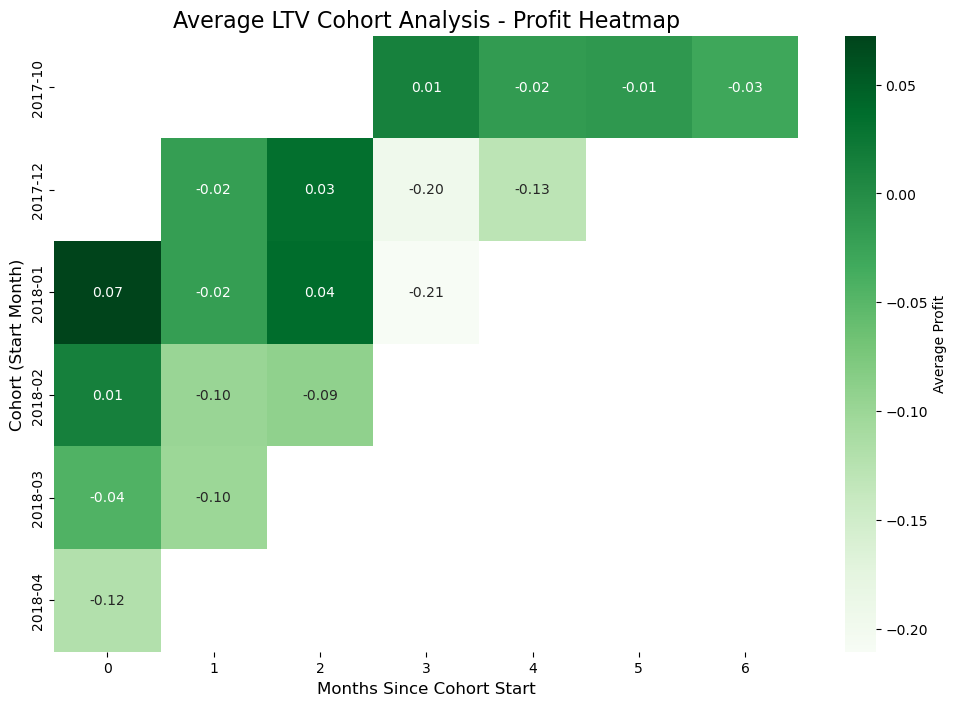

In [59]:
#Heat map visualization.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cohort_pivot, annot=True, fmt=".2f", cmap="Greens", cbar_kws={'label': 'Average Profit'})

plt.title("Average LTV Cohort Analysis - Profit Heatmap", fontsize=16)
plt.xlabel("Months Since Cohort Start", fontsize=12)
plt.ylabel("Cohort (Start Month)", fontsize=12)
plt.show()


In [ ]:
# Experimenting:
# Calculate active customers per cohort and month
# Pivot for cohort active customer percentages

cohort_sizes = ltv_transaction.groupby('cohort')['card_token'].nunique().reset_index()
cohort_sizes.rename(columns={'card_token': 'cohort_size'}, inplace=True)

active_customers = ltv_transaction.groupby(['cohort', 'months_since_cohort_start'])['card_token'].nunique().reset_index()
active_customers = active_customers.merge(cohort_sizes, on='cohort')
active_customers['percent_active'] = (active_customers['card_token'] / active_customers['cohort_size']) * 100

active_customer_pivot = active_customers.pivot(index='cohort', columns='months_since_cohort_start', values='percent_active')
active_customer_pivot.head()


months_since_cohort_start,0,1,2,3,4,5,6
cohort,,,,,,,
2017-10,NaN,NaN,NaN,92.307692,84.615385,76.923077,84.615385
2017-12,NaN,100.000000,100.000000,100.000000,50.000000,NaN,NaN
2018-01,20.134228,63.087248,70.469799,69.127517,NaN,NaN,NaN
2018-02,29.824561,77.192982,72.982456,NaN,NaN,NaN,NaN
2018-03,43.279570,88.978495,NaN,NaN,NaN,NaN,NaN


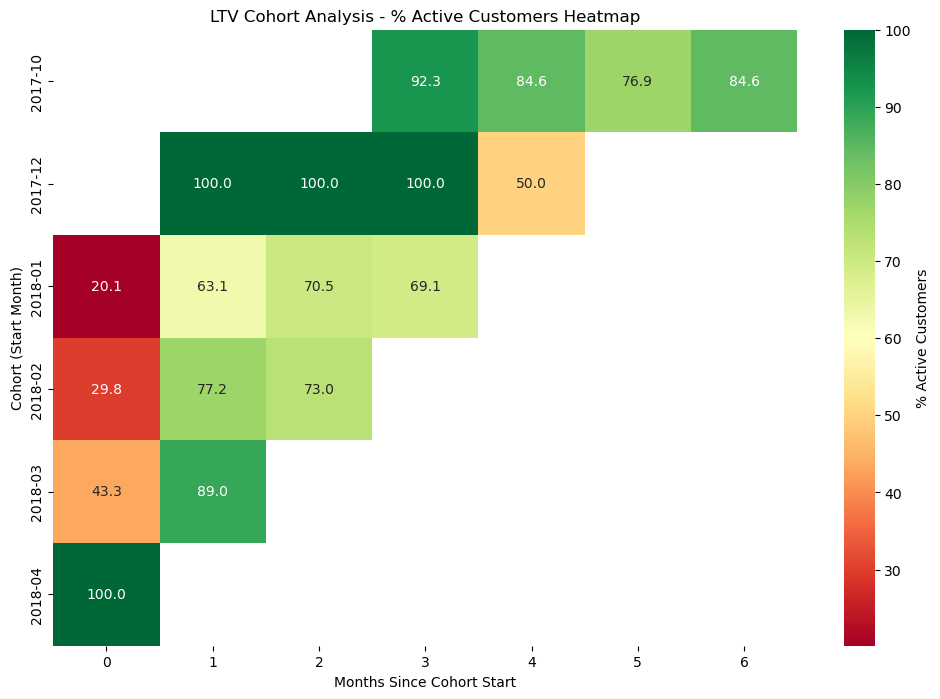

In [61]:
# Plotting the % Active Customers Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(active_customer_pivot, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': '% Active Customers'})
plt.title("LTV Cohort Analysis - % Active Customers Heatmap")
plt.xlabel("Months Since Cohort Start")
plt.ylabel("Cohort (Start Month)")
plt.show()
